In [39]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns
import numpy as np
# import the necessary packages

In [40]:
train = pd.read_csv("train.csv")
train.head()

test = pd.read_csv("test.csv")
test.head()

data = pd.concat([train, test]).reset_index(drop=True)
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  object 
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12700 non-null  float64
 6   VIP           12674 non-null  object 
 7   RoomService   12707 non-null  float64
 8   FoodCourt     12681 non-null  float64
 9   ShoppingMall  12664 non-null  float64
 10  Spa           12686 non-null  float64
 11  VRDeck        12702 non-null  float64
 12  Name          12676 non-null  object 
 13  Transported   8693 non-null   object 
dtypes: float64(6), object(8)
memory usage: 1.4+ MB


In [42]:
data_corr = pd.DataFrame(data)
data_corr = data_corr.dropna()

le = LabelEncoder()

for col in data_corr.select_dtypes(include='object').columns:
    data_corr[col] = le.fit_transform(data_corr[col])

<Axes: >

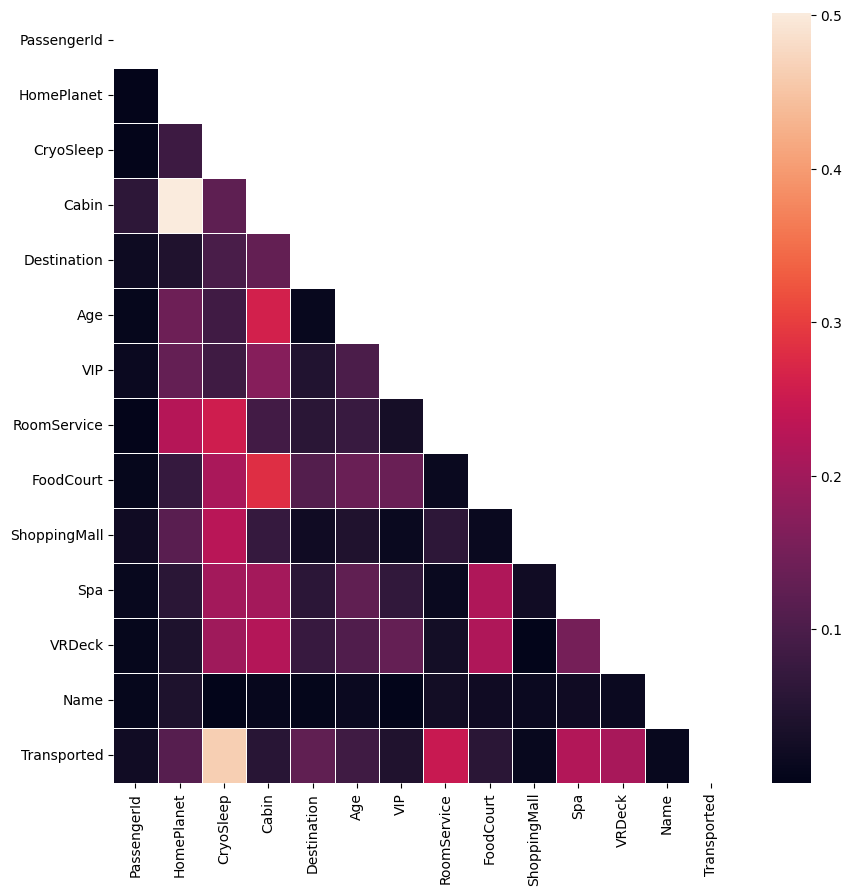

In [43]:
f, ax = plt.subplots(figsize=(10, 10))

corr = data_corr.corr().abs()
matrix_mask = np.triu(np.ones_like(corr)) # only show the upper triangular for the correlation matrix
sns.heatmap(corr, linewidths=.5, mask=matrix_mask)

<Axes: xlabel='VIP', ylabel='count'>

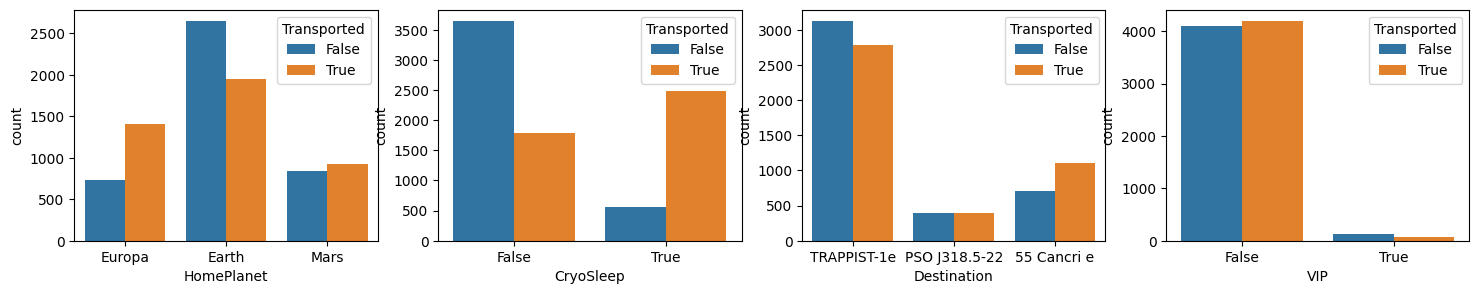

In [44]:
fig, axes = plt.subplots(1, 4, figsize=(18, 3))

sns.countplot(data, x="HomePlanet", hue="Transported", ax=axes[0])
sns.countplot(data, x="CryoSleep", hue="Transported", ax=axes[1])
sns.countplot(data, x="Destination", hue="Transported", ax=axes[2])
sns.countplot(data, x="VIP", hue="Transported", ax=axes[3])

<Axes: xlabel='Transported', ylabel='count'>

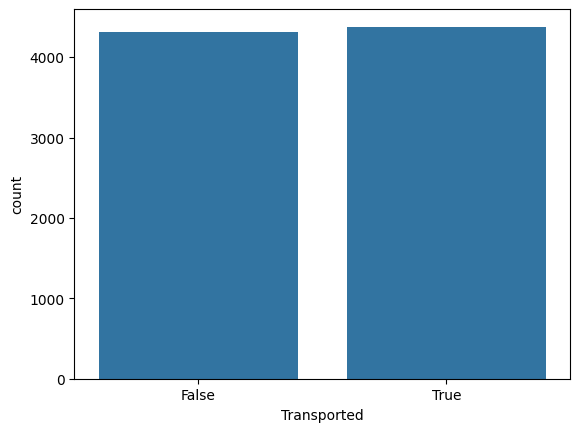

In [45]:
sns.countplot(data, x="Transported")

<Axes: xlabel='Age', ylabel='Percent'>

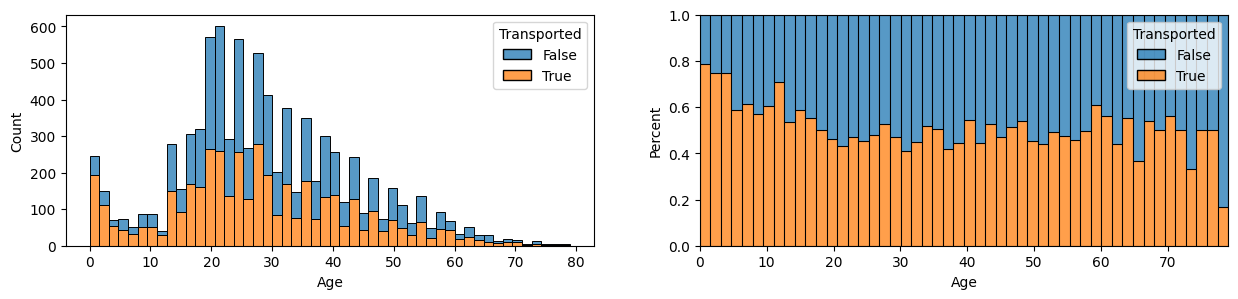

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(15, 3))

sns.histplot(data=data, x="Age", hue="Transported", bins=50, multiple='stack', ax=axes[0])
sns.histplot(data=data, x="Age", hue="Transported", bins=50, multiple='fill', stat='percent', ax=axes[1])

Filling out missing NAN

In [47]:
data['Destination'] = data['Destination'].transform(lambda x: x.fillna(x.mode()[0]))
data['VIP'] = data['VIP'].transform(lambda x: x.fillna(x.mode()[0]))
data['HomePlanet'] = data.groupby(by=["Destination"])['HomePlanet'].transform(lambda x: x.fillna(x.mode()[0]))
data['CryoSleep'] = data.groupby(by=["Destination", "VIP"])['CryoSleep'].transform(lambda x: x.fillna(x.mode()[0]))
data['Age'] = data.groupby(by=["CryoSleep", "VIP"])['Age'].transform(lambda x: x.fillna(x.mean()))
data['RoomService'] = data.groupby(by=["VIP"])['RoomService'].transform(lambda x: x.fillna(x.median()))
data['FoodCourt'] = data.groupby(by=["VIP"])['FoodCourt'].transform(lambda x: x.fillna(x.median()))
data['ShoppingMall'] = data.groupby(by=["VIP"])['ShoppingMall'].transform(lambda x: x.fillna(x.median()))
data['Spa'] = data.groupby(by=["VIP"])['Spa'].transform(lambda x: x.fillna(x.median()))
data['VRDeck'] = data.groupby(by=["VIP"])['VRDeck'].transform(lambda x: x.fillna(x.median()))

C:\Users\abhin\AppData\Local\Temp\ipykernel_9888\1874405825.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['VIP'] = data['VIP'].transform(lambda x: x.fillna(x.mode()[0]))
C:\Users\abhin\AppData\Local\Temp\ipykernel_9888\1874405825.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['CryoSleep'] = data.groupby(by=["Destination", "VIP"])['CryoSleep'].transform(lambda x: x.fillna(x.mode()[0]))


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12970 non-null  object 
 2   CryoSleep     12970 non-null  bool   
 3   Cabin         12671 non-null  object 
 4   Destination   12970 non-null  object 
 5   Age           12970 non-null  float64
 6   VIP           12970 non-null  bool   
 7   RoomService   12970 non-null  float64
 8   FoodCourt     12970 non-null  float64
 9   ShoppingMall  12970 non-null  float64
 10  Spa           12970 non-null  float64
 11  VRDeck        12970 non-null  float64
 12  Name          12676 non-null  object 
 13  Transported   8693 non-null   object 
dtypes: bool(2), float64(6), object(6)
memory usage: 1.2+ MB


In [49]:
data[['CabinDeck', 'CabinNum', 'CabinSide']] = data['Cabin'].str.split('/', expand=True)

In [50]:
data['CabinNum'] = data['CabinNum'].fillna(0)
data['CabinNum'] = data['CabinNum'].astype('int')

In [51]:
data['CabinDeck'] = data.groupby(by=["CryoSleep", "VIP"])['CabinDeck'].transform(lambda x: x.fillna(x.mode()[0]))
data['CabinSide'] = data.groupby(by=["CryoSleep", "VIP"])['CabinSide'].transform(lambda x: x.fillna(x.mode()[0]))

In [52]:
data = data.drop('Cabin',axis=1)

<Axes: xlabel='CabinSide', ylabel='count'>

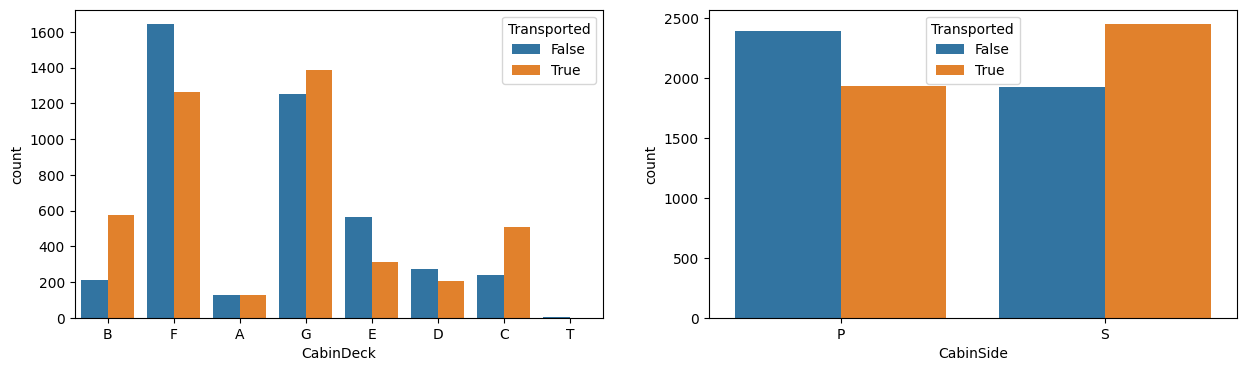

In [53]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

sns.countplot(data,x="CabinDeck",hue="Transported",ax=axes[0])
sns.countplot(data,x="CabinSide",hue="Transported",ax=axes[1])

In [54]:
data['CabinDeck'] = data['CabinDeck'].replace({'C': 'B', 'T': 'E', 'F': 'E'})

<Axes: xlabel='CabinDeck', ylabel='count'>

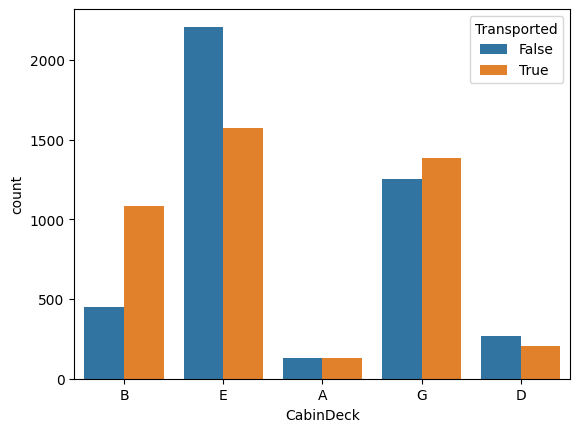

In [55]:
sns.countplot(data,x="CabinDeck",hue="Transported")

In [56]:
data[['GroupNumber', 'PassengerNumberWithinGroup']] = data['PassengerId'].str.split('_', expand=True)
data['GroupNumber'] = data['GroupNumber'].astype('int')
data['PassengerNumberWithinGroup'] = data['PassengerNumberWithinGroup'].astype('int')

value_counts = data['GroupNumber'].value_counts().to_dict()
data['GroupCount'] = data['GroupNumber'].map(value_counts)

data = data.drop('PassengerId',axis=1)

In [57]:
data[['First_Name', 'Last_Name']] = data['Name'].str.split(' ', expand=True)

le = LabelEncoder()
data['Last_Name_ID'] = le.fit_transform(data['Last_Name'])

value_counts = data['Last_Name_ID'].value_counts().to_dict()
data['FamilyCount'] = data['Last_Name_ID'].map(value_counts)

data = data.drop(['Name','First_Name','Last_Name', 'Last_Name_ID'],axis=1)
data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,CabinDeck,CabinNum,CabinSide,GroupNumber,PassengerNumberWithinGroup,GroupCount,FamilyCount
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P,1,1,1,3
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,E,0,S,2,1,1,4
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S,3,1,2,7
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S,3,2,2,7
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,E,1,S,4,1,1,9


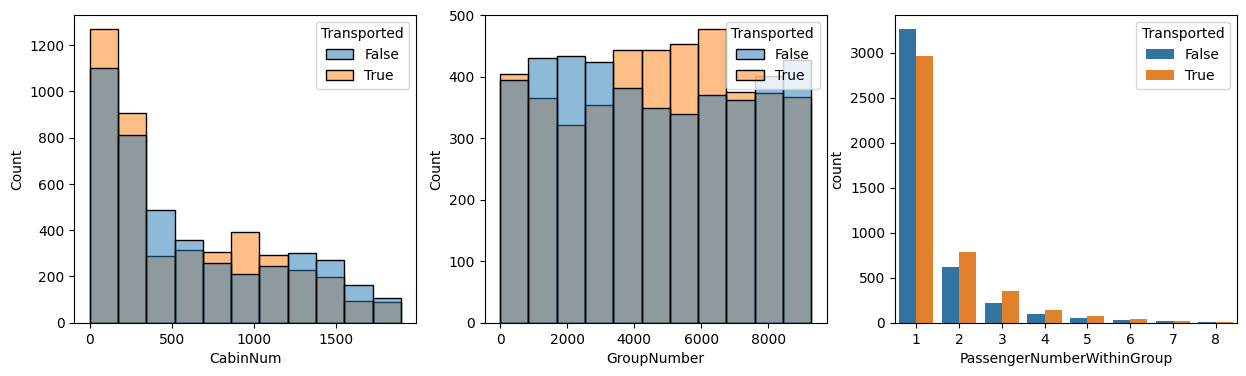

In [58]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sns.histplot(data=data, x="CabinNum", hue="Transported",bins=11,ax=axes[0])
sns.histplot(data=data, x="GroupNumber", hue="Transported",bins=11,ax=axes[1])
sns.countplot(data=data, x="PassengerNumberWithinGroup", hue="Transported",ax=axes[2])

data['PassengerNumberWithinGroup'] = data['PassengerNumberWithinGroup'].replace({3: 2})
data['PassengerNumberWithinGroup'] = data['PassengerNumberWithinGroup'].replace({8: 7})
data['PassengerNumberWithinGroup'] = data['PassengerNumberWithinGroup'].replace({7: 4, 6: 4, 5: 4})

<Axes: xlabel='PassengerNumberWithinGroup', ylabel='count'>

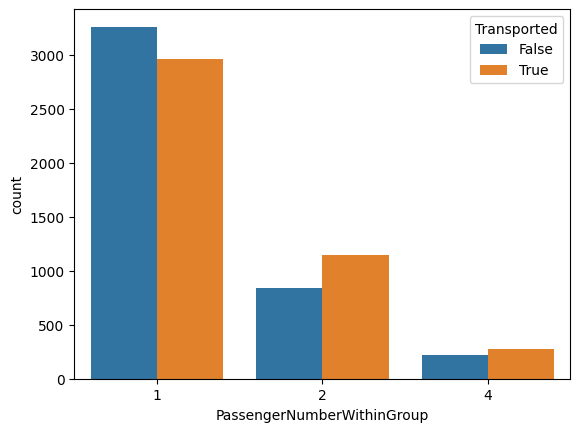

In [59]:
sns.countplot(data=data, x="PassengerNumberWithinGroup", hue="Transported")

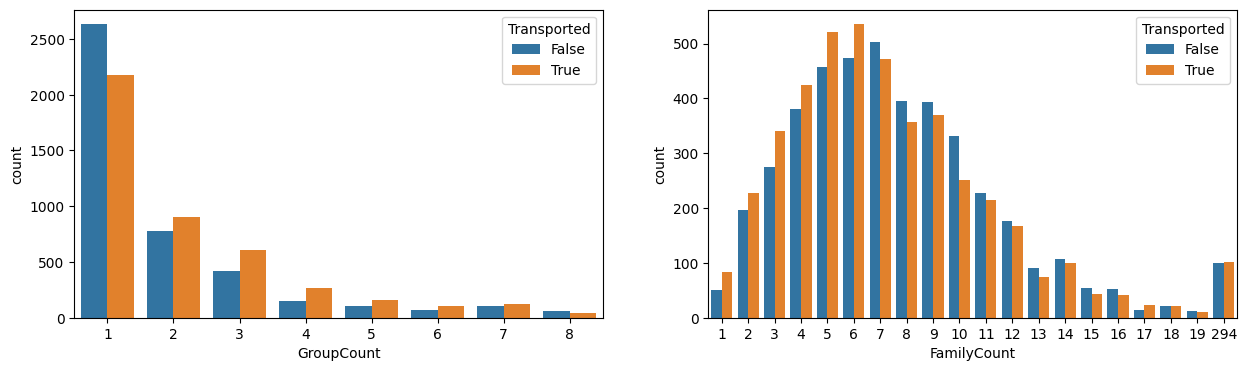

In [60]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

sns.countplot(data=data, x="GroupCount", hue="Transported",ax=axes[0])
sns.countplot(data=data, x="FamilyCount", hue="Transported",ax=axes[1])

data['FamilySolo'] = (data['FamilyCount'] == 1)
data['FamilyLow'] = (data['FamilyCount'] > 1) & (data['FamilyCount'] < 7)
data['FamilyMed'] = (data['FamilyCount'] > 6) & (data['FamilyCount'] < 11)
data['FamilyHigh'] = (data['FamilyCount'] > 10) & (data['FamilyCount'] < 16)
data['FamilyPacked'] = (data['FamilyCount'] > 15) & (data['FamilyCount'] < 290)
data['FamilyOutlier'] = (data['FamilyCount'] > 290)

data = data.drop('FamilyCount',axis=1)

In [61]:
data['TotalAmenities'] = data['RoomService'] + data['FoodCourt'] + data['ShoppingMall'] + data['Spa'] + data['VRDeck']

<Axes: xlabel='TotalAmenities', ylabel='Count'>

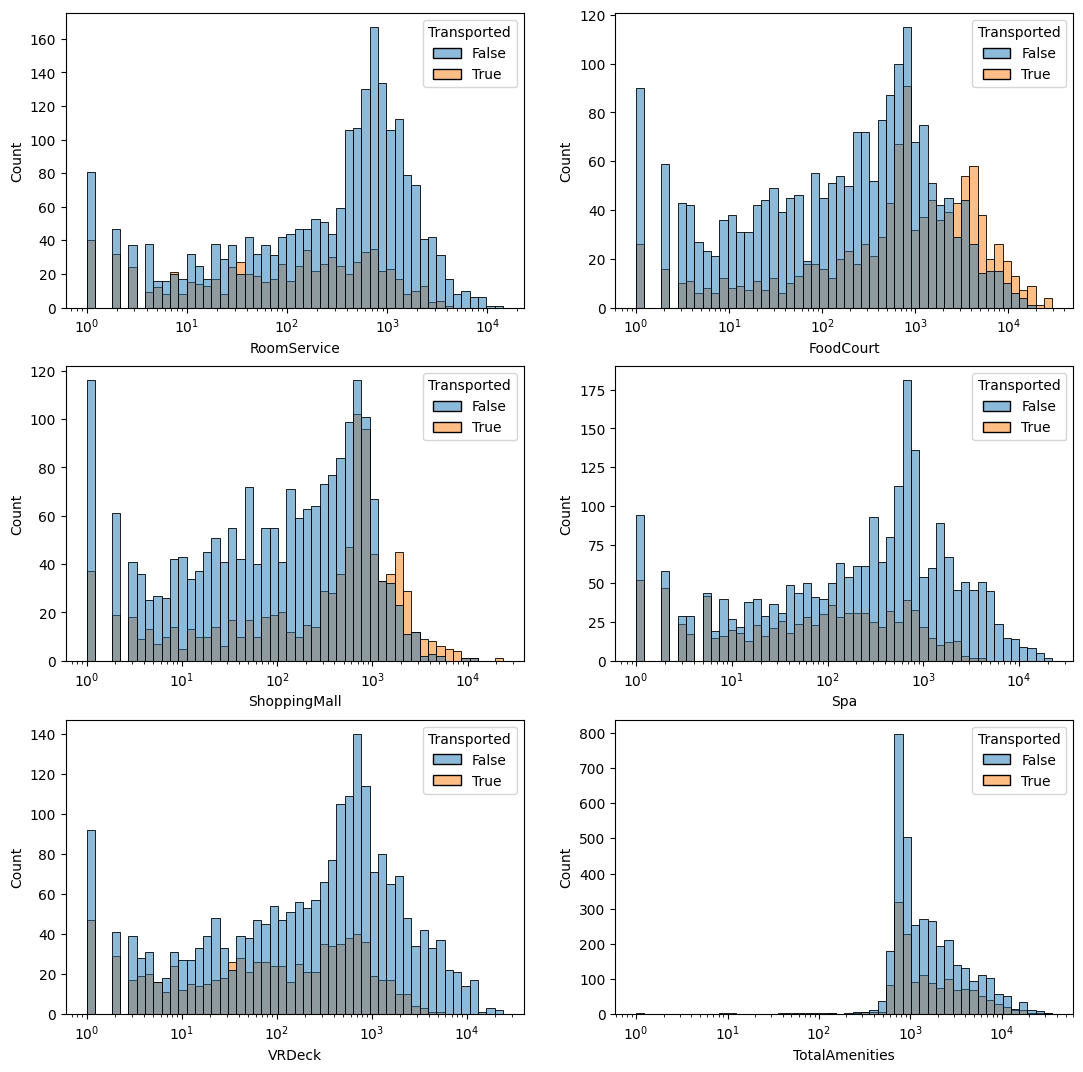

In [62]:
fig, axes = plt.subplots(3, 2, figsize=(13, 13))

sns.histplot(data=data, x="RoomService", hue="Transported",bins=50,log_scale=True,ax=axes[0][0])
sns.histplot(data=data, x="FoodCourt", hue="Transported",bins=50,log_scale=True,ax=axes[0][1])
sns.histplot(data=data, x="ShoppingMall", hue="Transported",bins=50,log_scale=True,ax=axes[1][0])
sns.histplot(data=data, x="Spa", hue="Transported",bins=50,log_scale=True,ax=axes[1][1])
sns.histplot(data=data, x="VRDeck", hue="Transported",bins=50,log_scale=True,ax=axes[2][0])
sns.histplot(data=data, x="TotalAmenities", hue="Transported",bins=50,log_scale=True,ax=axes[2][1])

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   HomePlanet                  12970 non-null  object 
 1   CryoSleep                   12970 non-null  bool   
 2   Destination                 12970 non-null  object 
 3   Age                         12970 non-null  float64
 4   VIP                         12970 non-null  bool   
 5   RoomService                 12970 non-null  float64
 6   FoodCourt                   12970 non-null  float64
 7   ShoppingMall                12970 non-null  float64
 8   Spa                         12970 non-null  float64
 9   VRDeck                      12970 non-null  float64
 10  Transported                 8693 non-null   object 
 11  CabinDeck                   12970 non-null  object 
 12  CabinNum                    12970 non-null  int32  
 13  CabinSide                   129

In [64]:
data['RoomService'] = np.log1p(data['RoomService'])
data['FoodCourt'] = np.log1p(data['FoodCourt'])
data['ShoppingMall'] = np.log1p(data['ShoppingMall'])
data['Spa'] = np.log1p(data['Spa'])
data['VRDeck'] = np.log1p(data['VRDeck'])
data['TotalAmenities'] = np.log1p(data['TotalAmenities'])

In [65]:
data['Age'] = pd.cut(data['Age'], bins=15)
data['CabinNum'] = pd.cut(data['CabinNum'], bins=20)
data['GroupNumber'] = pd.cut(data['GroupNumber'], bins=15)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   HomePlanet                  12970 non-null  object  
 1   CryoSleep                   12970 non-null  bool    
 2   Destination                 12970 non-null  object  
 3   Age                         12970 non-null  category
 4   VIP                         12970 non-null  bool    
 5   RoomService                 12970 non-null  float64 
 6   FoodCourt                   12970 non-null  float64 
 7   ShoppingMall                12970 non-null  float64 
 8   Spa                         12970 non-null  float64 
 9   VRDeck                      12970 non-null  float64 
 10  Transported                 8693 non-null   object  
 11  CabinDeck                   12970 non-null  object  
 12  CabinNum                    12970 non-null  category
 13  CabinSide       

In [66]:
data = pd.get_dummies(data, columns=['HomePlanet', 'Destination', 'CabinDeck', 'PassengerNumberWithinGroup', 'GroupCount'])
data.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,CabinNum,...,PassengerNumberWithinGroup_2,PassengerNumberWithinGroup_4,GroupCount_1,GroupCount_2,GroupCount_3,GroupCount_4,GroupCount_5,GroupCount_6,GroupCount_7,GroupCount_8
0,False,"(36.867, 42.133]",False,0.000000,0.000000,0.000000,0.000000,0.000000,False,"(-1.894, 94.7]",...,False,False,True,False,False,False,False,False,False,False
1,False,"(21.067, 26.333]",False,4.700480,2.302585,3.258097,6.309918,3.806662,True,"(-1.894, 94.7]",...,False,False,True,False,False,False,False,False,False,False
2,False,"(57.933, 63.2]",True,3.784190,8.182280,0.000000,8.812248,3.912023,False,"(-1.894, 94.7]",...,False,False,False,True,False,False,False,False,False,False
3,False,"(31.6, 36.867]",False,0.000000,7.157735,5.918894,8.110728,5.267858,False,"(-1.894, 94.7]",...,True,False,False,True,False,False,False,False,False,False
4,False,"(15.8, 21.067]",False,5.717028,4.262680,5.023881,6.338594,1.098612,True,"(-1.894, 94.7]",...,False,False,True,False,False,False,False,False,False,False
